# DATA ENGINEERING CBP

In [4]:
# Data Pipelining for Used Car Price Dataset

# 📌 Import Libraries
import pandas as pd
import numpy as np
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler

# 📌 Step 1: Data Ingestion
# Read the dataset
df = pd.read_csv(r"C:\Users\gujja\Downloads\used_cars.csv")
print(df)
print("✅ Data Ingestion Done")






         brand                            model  model_year      milage  \
0         Ford  Utility Police Interceptor Base        2013  51,000 mi.   
1      Hyundai                     Palisade SEL        2021  34,742 mi.   
2        Lexus                    RX 350 RX 350        2022  22,372 mi.   
3     INFINITI                 Q50 Hybrid Sport        2015  88,900 mi.   
4         Audi        Q3 45 S line Premium Plus        2021   9,835 mi.   
...        ...                              ...         ...         ...   
4004   Bentley             Continental GT Speed        2023     714 mi.   
4005      Audi             S4 3.0T Premium Plus        2022  10,900 mi.   
4006   Porsche                           Taycan        2022   2,116 mi.   
4007      Ford                     F-150 Raptor        2020  33,000 mi.   
4008       BMW                     X3 xDrive30i        2020  43,000 mi.   

          fuel_type                                             engine  \
0     E85 Flex Fuel  300.

✅ Data Export Done. Cleaned data saved to C:\Users\gujja\Downloads\cleaned_used_cars.csv

🔎 Final Cleaned Data Sample:
      brand                            model  model_year      milage  \
0      Ford  Utility Police Interceptor Base        2013  51,000 mi.   
1   Hyundai                     Palisade SEL        2021  34,742 mi.   
2     Lexus                    RX 350 RX 350        2022  22,372 mi.   
3  INFINITI                 Q50 Hybrid Sport        2015  88,900 mi.   
4      Audi        Q3 45 S line Premium Plus        2021   9,835 mi.   

       fuel_type                                             engine  \
0  E85 Flex Fuel  300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...   
1       Gasoline                               3.8L V6 24V GDI DOHC   
2       Gasoline                                     3.5 Liter DOHC   
3         Hybrid  354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...   
4       Gasoline                         2.0L I4 16V GDI DOHC Turbo   

        transmission 

In [ ]:
# 📌 Step 2: Data Cleaning

# 2.1 Handle Missing Values
# Option 1: Drop rows with missing values
print(df.isnull().sum())
# Clean 'price' column
if 'price' in df.columns:
    df['price'] = df['price'].astype(str).str.replace('$', '', regex=True).str.replace(',', '', regex=True)
    df['price'] = pd.to_numeric(df['price'], errors='coerce')

# Handle missing values
df['price'] = df['price'].fillna(df['price'].median())

# Convert 'model_year' to numeric and handle missing values
if 'model_year' in df.columns:
    df['model_year'] = pd.to_numeric(df['model_year'], errors='coerce')
    df['model_year'] = df['model_year'].fillna(df['model_year'].mode()[0])
    df['model_year'] = df['model_year'].astype(int)

# Feature Engineering
current_year = datetime.now().year
df['car_age'] = current_year - df['model_year']

# Optional: Scale 'price' and 'car_age'
scaler = MinMaxScaler()
df[['price', 'car_age']] = scaler.fit_transform(df[['price', 'car_age']])

# Done
print(df.head())
df = df.drop_duplicates()

print("✅ Data Cleaning Done")

In [ ]:
# 📌 Step 3: Data Transformation

# 3.1 Feature Engineering
# Create a new feature 'car_age'
current_year = datetime.now().year
df['car_age'] = current_year - df['model_year']

# 3.2 Normalize / Scale Numerical Columns
# Example: Scaling the 'price' and 'car_age' columns between 0 and 1
scaler = MinMaxScaler()

df[['price', 'car_age']] = scaler.fit_transform(df[['price', 'car_age']])

print("✅ Data Transformation Done")

print(df)

In [ ]:
# 📌 Step 4: Data Export / Output

# Save the cleaned and transformed dataset
# Save the cleaned DataFrame to a CSV file
output_path = r"C:\Users\gujja\Downloads\cleaned_used_cars.csv"
df.to_csv(output_path, index=False)
print(f"✅ Data Export Done. Cleaned data saved to {output_path}")

# Optionally, display the final DataFrame
print("\n🔎 Final Cleaned Data Sample:")
print(df.head())


In [14]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

#Load Cleaned Dataset
df = pd.read_csv(r"C:\Users\gujja\Downloads\cleaned_used_cars.csv")

Identify Non-Numeric Columns
non_numeric_cols = df.select_dtypes(include='object').columns.tolist()
print("🔍 Non-numeric columns to encode:", non_numeric_cols)

#One-Hot Encode All Categorical Columns
df_encoded = pd.get_dummies(df, columns=non_numeric_cols, drop_first=True)
df_encoded


🔍 Non-numeric columns to encode: ['brand', 'model', 'milage', 'fuel_type', 'engine', 'transmission', 'ext_col', 'int_col', 'accident', 'clean_title']


,model_year,price,car_age,brand_Alfa,brand_Aston,brand_Audi,brand_BMW,brand_Bentley,brand_Bugatti,brand_Buick,...,int_col_Tupelo,int_col_Very Light Cashmere,int_col_WHITE,int_col_Walnut,int_col_Whisper Beige,int_col_White,int_col_White / Brown,int_col_Yellow,int_col_–,accident_None reported
0,2013,0.002812,0.22,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2021,0.012196,0.06,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2022,0.017817,0.04,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,2015,0.004573,0.18,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,2021,0.011178,0.06,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4004,2023,0.117866,0.02,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
4005,2022,0.017581,0.04,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4006,2022,0.030148,0.04,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4007,2020,0.020663,0.08,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [18]:
pip install xgboost

     -------------------------------------- 150.0/150.0 MB 3.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [22]:
# 📌 Full Enhanced Pipeline: Clean → Engineer → Transform → Tune → Train

import pandas as pd
import numpy as np
import re
from datetime import datetime
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor
import warnings
warnings.filterwarnings("ignore")

# Step 1: Load data
df = pd.read_csv(r"C:\Users\gujja\Downloads\cleaned_used_cars.csv")

# Step 2: Clean 'milage'
def clean_milage(val):
    if pd.isnull(val):
        return np.nan
    val = re.sub(r'[^\d.]', '', str(val))
    try:
        return float(val)
    except:
        return np.nan

df['milage'] = df['milage'].apply(clean_milage)

# Step 3: Clean 'engine'
df['engine'] = df['engine'].str.extract(r'([\d.]+)', expand=False)
df['engine'] = pd.to_numeric(df['engine'], errors='coerce')

# Step 4: Feature engineering
df['car_age_years'] = datetime.now().year - df['model_year']
df['price_per_year'] = df['price'] / (df['car_age_years'] + 1)
df['mileage_per_year'] = df['milage'] / (df['car_age_years'] + 1)
df['is_luxury_brand'] = df['brand'].isin(['BMW', 'Audi', 'Mercedes-Benz', 'Lexus', 'Tesla']).astype(int)

# Step 5: Reduce high-cardinality categories
def keep_top_n(df, col, n=20):
    top_n = df[col].value_counts().nlargest(n).index
    df[col] = df[col].where(df[col].isin(top_n), other='Other')
    return df

for col in ['model', 'int_col', 'ext_col']:
    df = keep_top_n(df, col, 20)

# Step 6: Drop outliers
df = df[(df['price'] > df['price'].quantile(0.01)) & (df['price'] < df['price'].quantile(0.99))]

# Step 7: Log-transform price
df['log_price'] = np.log1p(df['price'])

# Step 8: One-hot encode categoricals
cat_cols = df.select_dtypes(include='object').columns.tolist()
df_encoded = pd.get_dummies(df, columns=cat_cols, drop_first=True)

# Step 9: Prepare data for training
X = df_encoded.drop(columns=['price', 'log_price'])
y = df_encoded['log_price']  # Target: log(price)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 10: Hyperparameter tuning with RandomizedSearchCV
param_grid = {
    'n_estimators': [200, 300, 400],
    'max_depth': [4, 6, 8],
    'learning_rate': [0.03, 0.05, 0.1],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

search = RandomizedSearchCV(XGBRegressor(random_state=42), param_grid, 
                            scoring='r2', n_iter=10, cv=3, verbose=1)
search.fit(X_train, y_train)
best_model = search.best_estimator_

# Step 11: Evaluate on test set
y_pred_log = best_model.predict(X_test)
y_pred = np.expm1(y_pred_log)  # convert back from log

# Actual prices for reference
y_test_actual = np.expm1(y_test)

# Final evaluation
print("✅ Model Trained: XGBoost (Tuned + Transformed)")
print(f"🔹 MSE (Actual Price): {mean_squared_error(y_test_actual, y_pred)}")
print(f"🔹 R² Score (Actual Price): {r2_score(y_test_actual, y_pred)}")


Fitting 3 folds for each of 10 candidates, totalling 30 fits
✅ Model Trained: XGBoost (Tuned + Transformed)
🔹 MSE (Actual Price): 1.8883579865086239e-06
🔹 R² Score (Actual Price): 0.9863213946921698


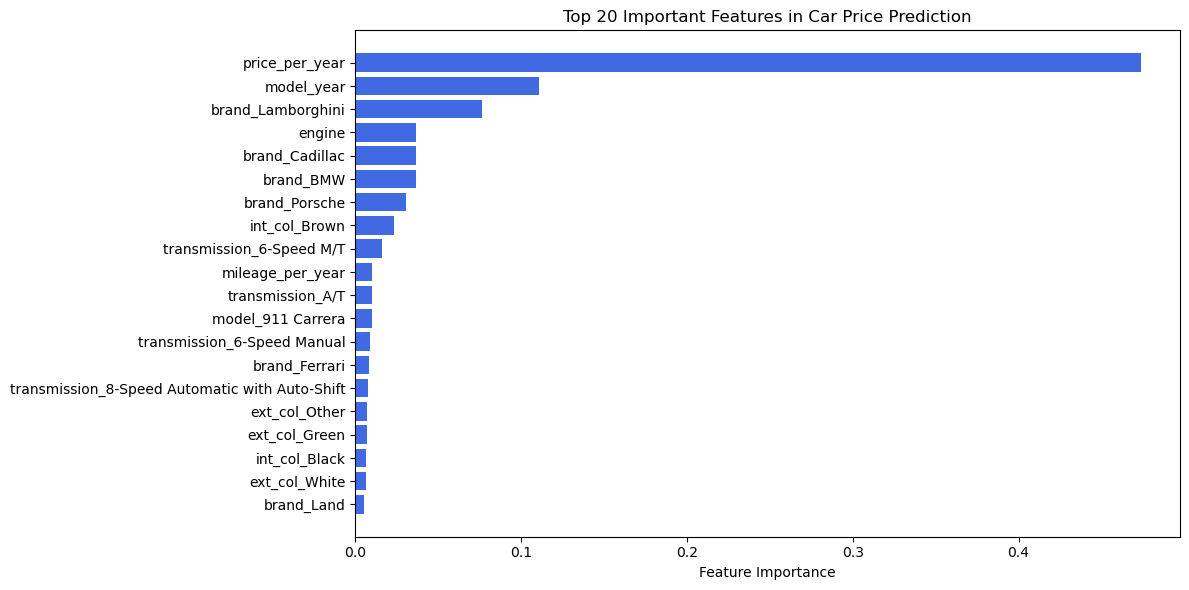

In [32]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

# Get feature importances
importances = best_model.feature_importances_
feature_names = X.columns

# Top 20
indices = np.argsort(importances)[-20:][::-1]
top_features = feature_names[indices]
top_importances = importances[indices]

# Plot
plt.figure(figsize=(12, 6))
plt.barh(top_features, top_importances, color='royalblue')
plt.xlabel("Feature Importance")
plt.title("Top 20 Important Features in Car Price Prediction")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


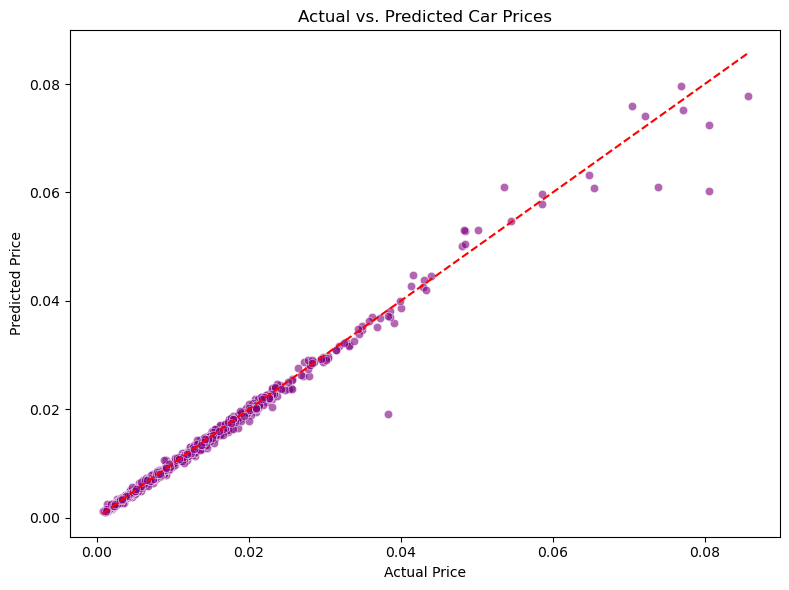

In [33]:
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test_actual, y=y_pred, alpha=0.6, color='purple')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs. Predicted Car Prices")
plt.plot([y_test_actual.min(), y_test_actual.max()],
         [y_test_actual.min(), y_test_actual.max()], 'r--')  # diagonal
plt.tight_layout()
plt.show()


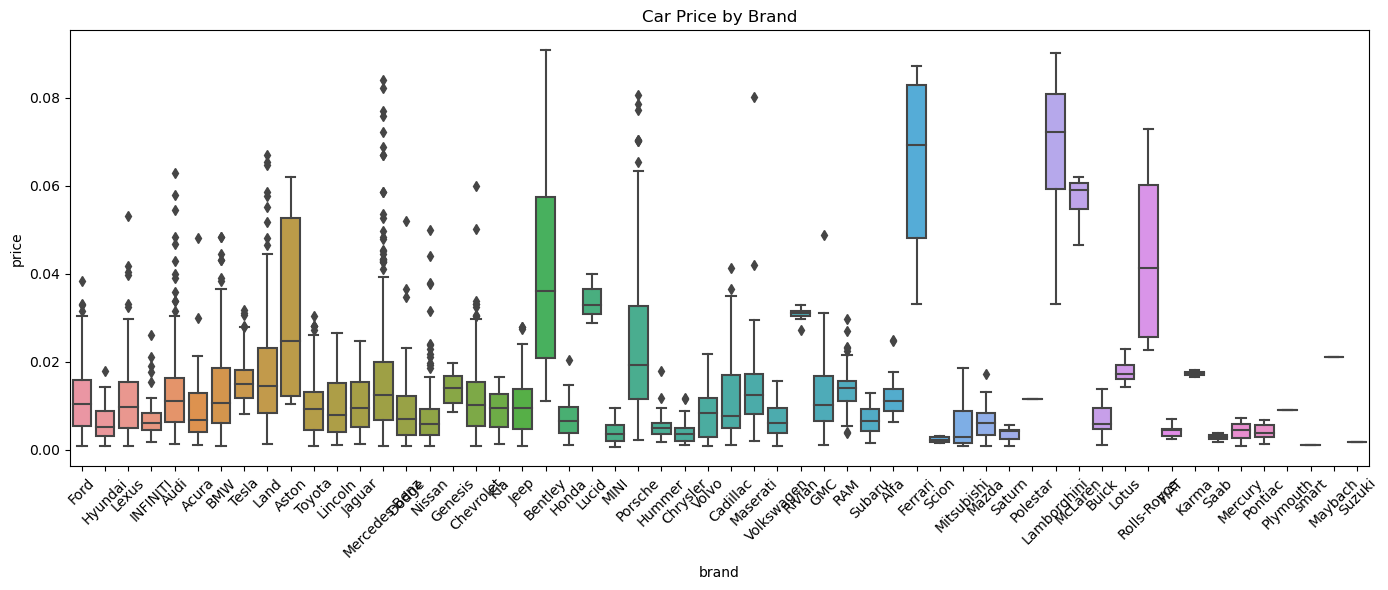

In [34]:
plt.figure(figsize=(14, 6))
sns.boxplot(x='brand', y='price', data=df[df['brand'] != 'Other'])
plt.xticks(rotation=45)
plt.title("Car Price by Brand")
plt.tight_layout()
plt.show()


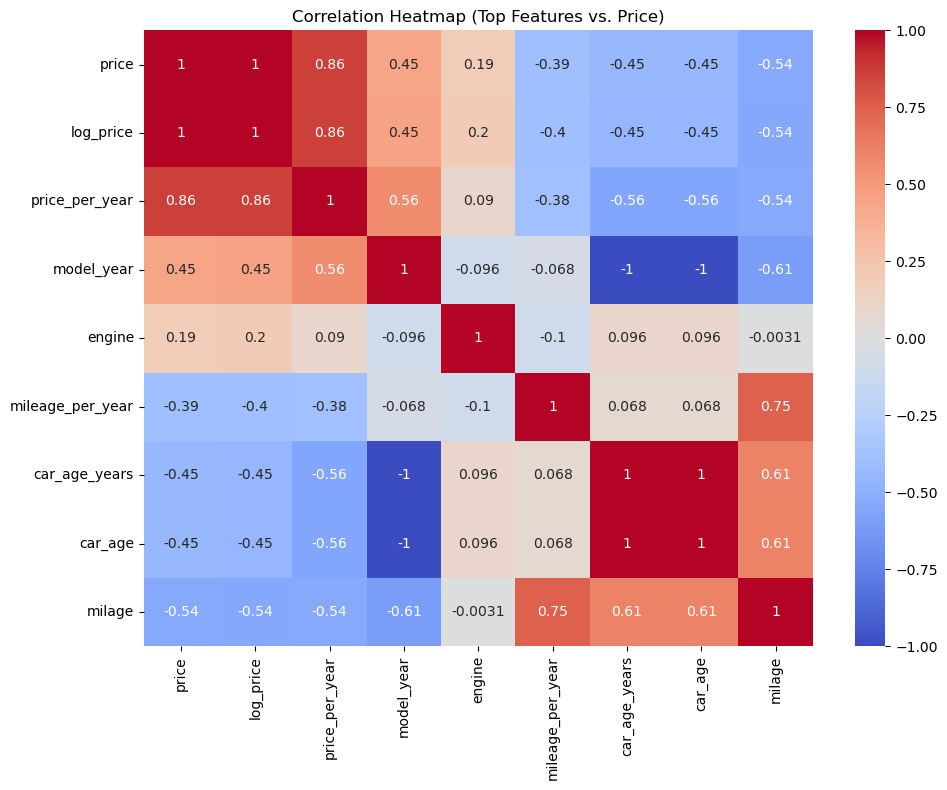

In [35]:
plt.figure(figsize=(10, 8))
numerics = df.select_dtypes(include=['float64', 'int64'])
top_corr = numerics.corr().nlargest(10, 'price')['price'].index
sns.heatmap(numerics[top_corr].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap (Top Features vs. Price)")
plt.tight_layout()
plt.show()


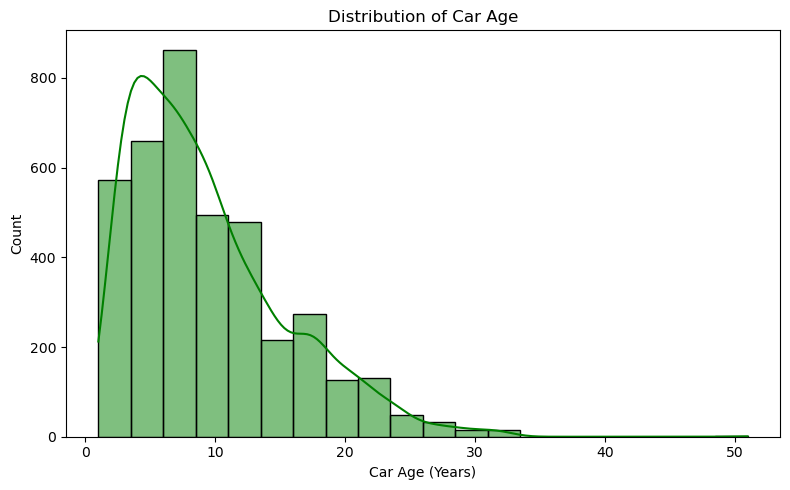

In [36]:
plt.figure(figsize=(8, 5))
sns.histplot(df['car_age_years'], bins=20, kde=True, color='green')
plt.title("Distribution of Car Age")
plt.xlabel("Car Age (Years)")
plt.tight_layout()
plt.show()


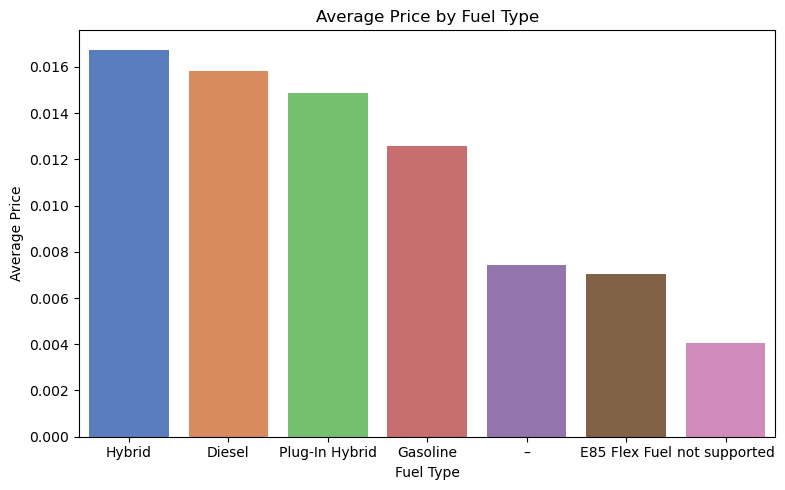

In [37]:
plt.figure(figsize=(8, 5))
fuel_price = df.groupby('fuel_type')['price'].mean().sort_values(ascending=False)
sns.barplot(x=fuel_price.index, y=fuel_price.values, palette='muted')
plt.title("Average Price by Fuel Type")
plt.ylabel("Average Price")
plt.xlabel("Fuel Type")
plt.tight_layout()
plt.show()


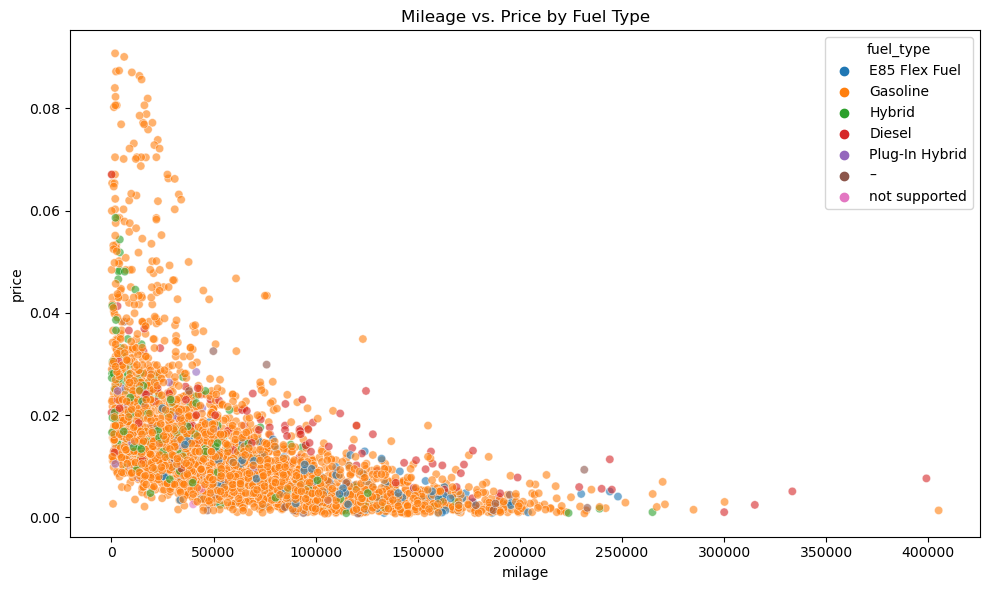

In [39]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='milage', y='price', hue='fuel_type', alpha=0.6)
plt.title("Mileage vs. Price by Fuel Type")
plt.tight_layout()
plt.show()


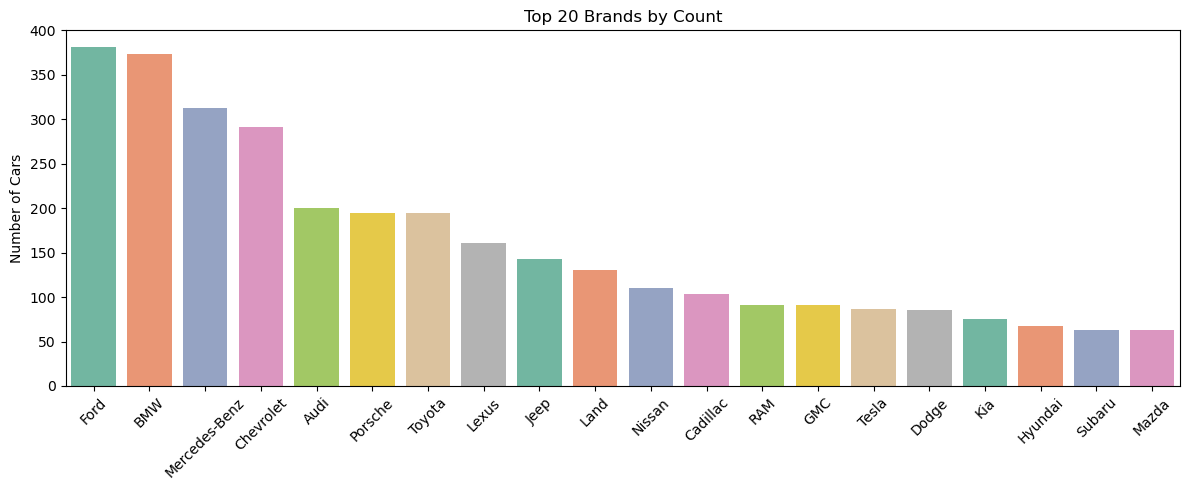

In [40]:
plt.figure(figsize=(12, 5))
brand_counts = df['brand'].value_counts().head(20)
sns.barplot(x=brand_counts.index, y=brand_counts.values, palette='Set2')
plt.title("Top 20 Brands by Count")
plt.xticks(rotation=45)
plt.ylabel("Number of Cars")
plt.tight_layout()
plt.show()
